In [34]:
"""
Watermark:
© Clarity Kummer 2024
"""

'\nWatermark:\n© Clarity Kummer 2024\n'

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

In [3]:
raw_df = pd.read_csv('stats.csv)

In [4]:
df = raw_df.copy()
df.drop('last_name, first_name',axis = 1,inplace=True)
df.drop('player_id',axis = 1,inplace=True)

In [5]:
train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]

## Non-Outcome Oriented Features:
### Linear models are under the assumption features have a linear relationship with the response
#### Here I am ensuring that the features that are to be used (non-outcome oriented features) do in face have a linear relationship with the response

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['k_percent', 'exit_velocity_avg', 'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent', 'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed', 'whiff_percent', 'swing_percent', 'groundballs_percent', 'flyballs_percent']
y = raw_df['on_base_plus_slg'] 

for feature in features:
    X = raw_df[feature]  
    plt.figure(figsize=(8, 6)) 
    sns.scatterplot(x=X, y=y)
    sns.regplot(x=X, y=y, scatter=False, color='red')
    plt.xlabel(feature)  
    plt.ylabel('on_base_plus_slg')
    plt.title(f'Scatter plot with trend line for {feature}') 
    plt.savefig(f'{feature}_scatter_plot.png') 
    plt.show()

## Linear Regression Training / Validation 
#### all features

In [27]:
####TRAINING
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']
scaler = StandardScaler()
model = linear_model.LinearRegression()

X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
X_train_scaled = scaler.fit_transform(X_train) 

model.fit(X_train_scaled, y_train)

MAE_train = mean_absolute_error(y_train,model.predict(X_train_scaled))
MSE_train = mean_squared_error(y_train,model.predict(X_train_scaled))
RMSE_train = np.sqrt(MSE_train)
print("RMSE_train: %f" % (RMSE_train))
print("MAE_train: %f" % (MAE_train))
print(f'The accuracy on the trainning data is: {model.score(X_train_scaled,y_train):.3}.')


X_val = val_df[features]
y_val = val_df['on_base_plus_slg']
X_val_scaled = scaler.transform(X_val)

validation_predictions = model.predict(X_val_scaled)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)
print(f'Accuracy on Validation Data R^2= {model.score(X_val_scaled,y_val):.3}')
print("RMSE_val: %f" % (RMSE_val))
print("MAE_val: %f" % (MAE_val))


RMSE_train: 0.058858
MAE_train: 0.046586
The accuracy on the trainning data is: 0.637.
Accuracy on Validation Data R^2= 0.417
RMSE_val: 0.063538
MAE_val: 0.052186


array([[ 0.37219631,  0.65941302, -1.39980238, ...,  0.79695562,
         1.42044179, -1.12203231],
       [-0.39183664, -1.38683297,  0.627568  , ...,  0.93946549,
         0.19191214, -0.33868718],
       [ 0.02339866, -0.12425566,  0.51105246, ..., -0.40419901,
        -0.1795038 ,  0.40984261],
       ...,
       [ 0.02339866,  0.13696723, -0.35116253, ...,  1.00054115,
        -0.9794766 ,  1.3324491 ],
       [-1.96973076, -1.86574161,  0.13820274, ..., -1.78858061,
        -0.06522197, -0.37350252],
       [-0.65758723,  0.61587587,  0.0216872 , ...,  0.0233306 ,
         0.70618036, -0.61720989]])

## PERMUTATION FEATURE IMPORTANCE ON LINEAR REGRESSION MODEL
##### THERE ARE MANY FEATURES AND ALL OF THEM HAVE VERY SMALL WEIGHTS (COEF VALUES) SO I AM GOING TO PERFORM PERMUTATION IMPORTANCE
##### PERMUTATION IMPORTANCE::::evalutates the contributions of each feature to a fitted model 

In [16]:

# X_feat_importance = val_df[features]
# y_feat_importance = val_df['on_base_plus_slg']
# model = linear_model.LinearRegression()
# model.fit(X_feat_importance, y_feat_importance)
# pi = permutation_importancedd(estimator=model, X=X_feat_importance, y=y_feat_importance, random_state=0)
# print(f'pi.importances_mean={pi.importances_mean}')
# print(f'pi.importances_std={pi.importances_std}')
# print(f'pi.importances={pi.importances}')
# plt.figure(figsize=(8, 6))
# plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
# plt.title('Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB')
# plt.xlabel('feature name')
# plt.xticks(rotation=25)
# plt.savefig(f'Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB.png')
# _ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')

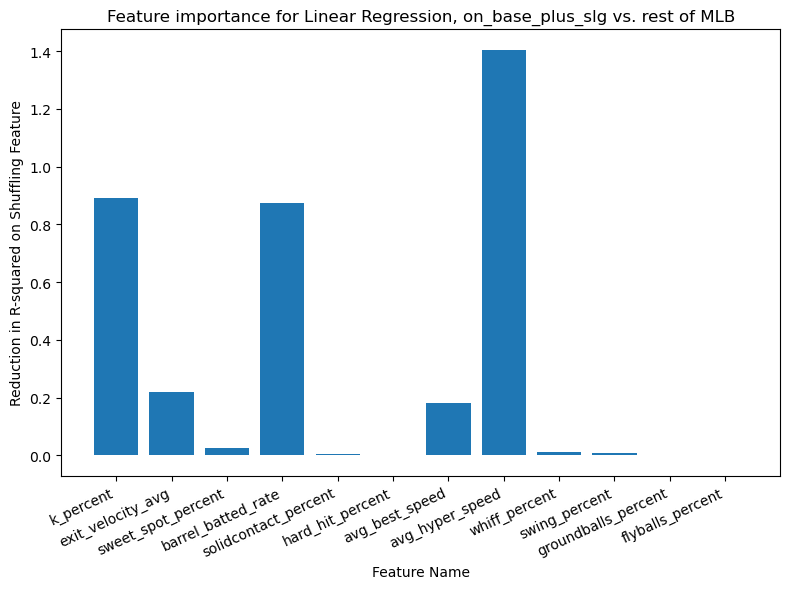

In [15]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.inspection import permutation_importance

model = linear_model.LinearRegression()

X_feat_importance = val_df[features]
X_feat_importance_scaled = scaler.transform(X_feat_importance)
y_feat_importance = val_df['on_base_plus_slg']

model.fit(X_feat_importance_scaled, y_feat_importance)
pi = permutation_importance(estimator=model, X=X_feat_importance_scaled, y=y_feat_importance, random_state=0)

plt.figure(figsize=(8, 6))
plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
plt.title('Feature importance for Linear Regression, on_base_plus_slg vs. rest of MLB')
plt.xlabel('Feature Name')
plt.ylabel('Reduction in R-squared on Shuffling Feature')
plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.savefig('Feature_importance_LinearRegression_on_base_plus_slg_vs_rest_of_MLB.png')
plt.show()


### ANALYZING SUBSETS OF THE MOST IMPORTANT FEATURES


#### 1) features: k_percent, exit_velocity_avg, sweet_spot_percent, barrel_batted_rate, avg_hyper_speed, avg_best_speed

In [18]:
features = ['k_percent','exit_velocity_avg','sweet_spot_percent','barrel_batted_rate','avg_best_speed','avg_hyper_speed']

model = linear_model.LinearRegression()
scaler = StandardScaler()

X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
X_train_scaled = scaler.fit_transform(X_train) 


X_val = val_df[features]
y_val = val_df['on_base_plus_slg']
X_val_scaled = scaler.transform(X_val)

model.fit(X_train_scaled,y_train)

MAE_train = mean_absolute_error(y_train,model.predict(X_train_scaled))
MSE_train = mean_squared_error(y_train,model.predict(X_train_scaled))
RMSE_train = np.sqrt(MAE_train)


print("RMSE_train: %f" % (RMSE_train))
print("MAE_train: %f" % (MAE_train))
print(f'The accuracy on the training data is = {model.score(X_train_scaled,y_train):.3}.')

#Validation
validation_predictions = model.predict(X_val_scaled)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)


print("RMSE_val: %f" % (RMSE_val))
print("MAE_val: %f" % (MAE_val))
print(f'The accuracy on the validation data is: {model.score(X_val_scaled,y_val):.3}.')

RMSE_train: 0.218420
MAE_train: 0.047707
The accuracy on the training data is = 0.609.
RMSE_val: 0.065918
MAE_val: 0.054388
The accuracy on the validation data is: 0.373.


In [52]:
# features = ['k_percent','exit_velocity_avg','barrel_batted_rate','avg_hyper_speed','avg_best_speed']
# X_train = train_df[features]
# y_train = train_df['on_base_plus_slg']
# model = linear_model.LinearRegression()
# model.fit(X_train,y_train)
# MAE_train = mean_absolute_error(y_train,model.predict(X_train))
# MSE_train = mean_squared_error(y_train,model.predict(X_train))
# RMSE_train = np.sqrt(MAE_train)

# print("MAE_train: %f" % (MAE_val))
# print("RMSE_train: %f" % (RMSE_val))
# print(f'The accuracy on the validation data is: {model.score(X_train,y_train):.3}.')
# print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

# print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

# X_val = val_df[features]
# y_val = val_df['on_base_plus_slg']
# validation_predictions = model.predict(X_val)
# MAE_val = mean_absolute_error(y_val,validation_predictions)
# MSE_val = mean_squared_error(y_val,validation_predictions)
# RMSE_val = np.sqrt(MSE_val)

# print("MAE_val: %f" % (MAE_val))
# print("RMSE_val: %f" % (RMSE_val))
# print(f'The accuracy on the validation data is: {model.score(X_val,y_val):.3}.')

## Testing Linear Regression on the 2023 Data


In [33]:
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']

model = linear_model.LinearRegression()
scaler = StandardScaler()

X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
X_train_scaled = scaler.fit_transform(X_train) 


X_test = test_df[features]
y_test = test_df['on_base_plus_slg']
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled,y_train)


test_predictions = model.predict(X_test_scaled)
ops_diff_std = test_predictions - y_test
print(ops_diff_std.std())
MAE_test = mean_absolute_error(y_test,test_predictions)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)


print(f'RMSE on Test Data: {RMSE_test:.6}')
print(f'MAE on Test Data: {MAE_test:.6}')
print(f'MSE on Test Data: {MSE_test:.3}')


print(f'{model.score(X_test_scaled,y_test):.3}.')

0.04933304142525789
RMSE on Test Data: 0.052448
MAE on Test Data: 0.0422228
MSE on Test Data: 0.00275
0.585.


In [69]:
# ops_diff_std[1:5].std

In [22]:
ops_diff_std[1:5].std

<bound method Series.std of 405    0.023161
406    0.046487
407   -0.038382
408    0.041171
Name: on_base_plus_slg, dtype: float64>

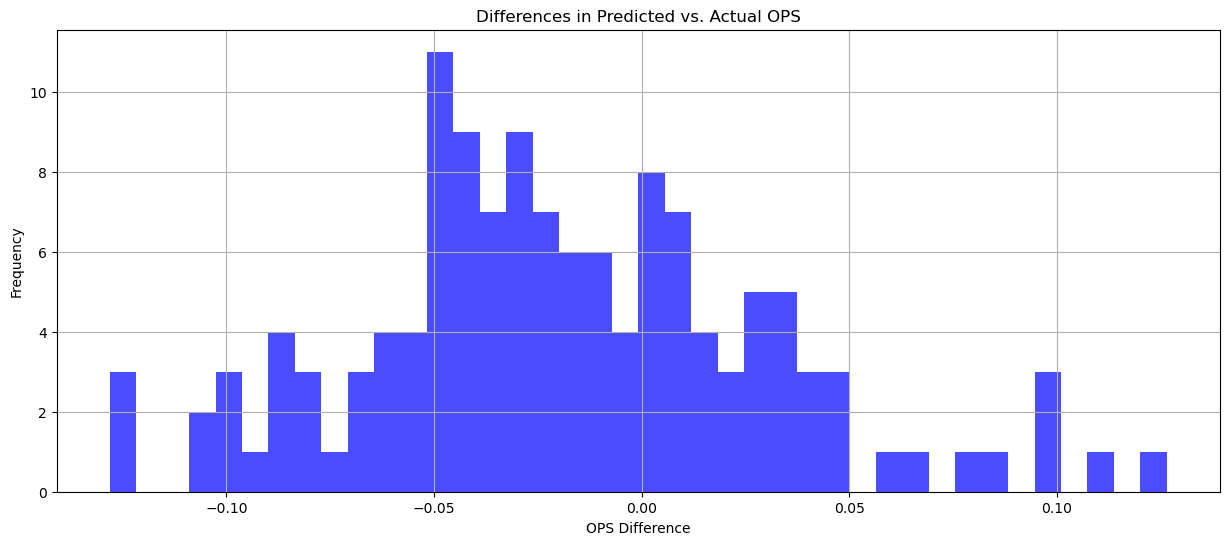

In [23]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Differences in Predicted vs. Actual OPS.png')
plt.show()

## Comparing our linear Regression on Existing 2023 BATX Prediction Model

In [3]:
df = pd.read_csv('stats.csv')
batx_df = pd.read_csv('fangraphs-leaderboard-projections-batX.csv')

raw_df = pd.read_csv('stats.csv')
test_df = raw_df[raw_df.year==2023]
def clean_and_rearrange_names(name):
    parts = name.split(',')
    if len(parts) == 2:
        return parts[1].strip() + ' ' + parts[0].strip()
    else:
        return name

test_df['Name'] = test_df['last_name, first_name'].apply(clean_and_rearrange_names)

merged_df = pd.merge(test_df, batx_df, left_on='Name', right_on='Name', suffixes=('_model', '_batx'))


In [2]:
##Comparing BATX to actual outcomes. 

merged_df['OPS_Difference'] = merged_df['OPS'] - merged_df['on_base_plus_slg']
                                                          
plt.figure(figsize=(10, 6))
plt.hist(merged_df['OPS_Difference'], bins=40, alpha=0.7, color='blue')
plt.title('Difference in OPS: Model vs. BatX')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print statistical measures
ops_diff_std = merged_df['OPS_Difference'].std()
mean_ops_difference = merged_df['OPS_Difference'].mean()
print(f"STD of OPS_Difference: {ops_diff_std:.3f}")
print(f"Mean of OPS_Difference: {mean_ops_difference:.3f}")